In [ ]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt

#Import data from Github

In [ ]:
url = 'https://raw.githubusercontent.com/nghiale0811/amz/master/1429_1.csv'
df = pd.read_csv(url)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [ ]:
df.shape

(34660, 21)

In [ ]:
df1 = df[['reviews.rating', 'reviews.text', 'reviews.title', 'reviews.username']]

In [ ]:
df1.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [ ]:
df1.isnull().sum()

reviews.rating      33
reviews.text         1
reviews.title        5
reviews.username     2
dtype: int64

#Filtering null values

In [ ]:
#Choose only rows with non-empty review rating
df2 = df1[df1["reviews.rating"].notnull()]
df2.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [ ]:
#Store data with null review rating
df3 = df1[df1["reviews.rating"].isnull()]
df3.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
2886,NaN,The Kindle is my first e-ink reader. I own an ...,"Worth the money. Not perfect, but very very go...",Jeffrey Stanley
2887,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen
2888,NaN,UPDATE NOVEMBER 2011:My review is now over a y...,Kindle vs. Nook (updated),Ron Cronovich
2889,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen
2890,NaN,I woke up to a nice surprise this morning: a n...,"Not the perfect do-it-all device, but very clo...",C. Tipton


In [ ]:
#We will classify review with rating >= 4 positive, otherwise negative
df2['sentiments'] = df2['reviews.rating'] >= 4
df2['sentiments'] = df2['sentiments'].replace([True, False], ['Positive', 'Negative'])
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,reviews.rating,reviews.text,reviews.title,reviews.username,sentiments
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter,Positive
1,5.0,great for beginner or experienced person. Boug...,very fast,truman,Positive
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,Positive
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,Positive
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,Positive


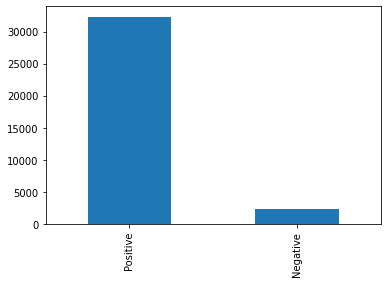

In [ ]:
df2['sentiments'].value_counts().plot.bar()

Note that the data is imbalanced

#Cleaning text with NLTK

In [ ]:
import re
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
import string

In [ ]:
regex = re.compile('[^a-z]+')

In [ ]:
def clean(sentence):
  sentence = str(sentence)
  sentence = sentence.lower()
  sentence = regex.sub(' ', sentence).strip()
  return sentence

df2["cleaned_reviews"] = df2["reviews.text"].apply(clean)
df3["cleaned_reviews"] = df3["reviews.text"].apply(clean)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df2.head()

,reviews.rating,reviews.text,reviews.title,reviews.username,sentiments,cleaned_reviews
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter,Positive,this product so far has not disappointed my ch...
1,5.0,great for beginner or experienced person. Boug...,very fast,truman,Positive,great for beginner or experienced person bough...
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,Positive,inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,Positive,i ve had my fire hd two weeks now and i love i...
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,Positive,i bought this for my grand daughter when she c...


#Train test split

In [ ]:
split = df2[["cleaned_reviews" , "sentiments"]]
train = split.sample(frac=0.8,random_state=200)
test = split.drop(train.index)

#Feature extracter for NLTK Naive Bayes

In [ ]:
def make_feature(words):
    features = {}
    for word in words:
        features [word] = True
    return features

In [ ]:
train["words"] = train["cleaned_reviews"].str.lower().str.split()
test["words"] = test["cleaned_reviews"].str.lower().str.split()
df3["words"] = df3["cleaned_reviews"].str.lower().str.split()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
train.head()

,cleaned_reviews,sentiments,words
21749,i am very happy with my kindle excellent useful,Positive,"[i, am, very, happy, with, my, kindle, excelle..."
9637,decent tabletperforms ok you really get what y...,Negative,"[decent, tabletperforms, ok, you, really, get,..."
30112,this product works better than the smart tv fu...,Positive,"[this, product, works, better, than, the, smar..."
31004,absolutely best amazon product ever very easy ...,Positive,"[absolutely, best, amazon, product, ever, very..."
17186,my son absolutely loves this tablet he has dro...,Positive,"[my, son, absolutely, loves, this, tablet, he,..."


In [ ]:
prediction =  {} ## For storing results of different classifiers

train.index = range(train.shape[0])
test.index = range(test.shape[0])
df3.index = range(df3.shape[0])

train_naive = []
test_naive = []
nan_naive = []

for i in range(train.shape[0]):
    train_naive = train_naive + [[make_feature(train["words"][i]) , train["sentiments"][i]]]
for i in range(test.shape[0]):
    test_naive = test_naive + [[make_feature(test["words"][i]) , test["sentiments"][i]]]
for i in range(df3.shape[0]):
    nan_naive = nan_naive + [make_feature(df3["words"][i])]

In [ ]:
#train_naive

In [ ]:
classifier = NaiveBayesClassifier.train(train_naive)
print("NLTK Naive bayes Accuracy : {}".format(nltk.classify.util.accuracy(classifier , test_naive)))
classifier.show_most_informative_features(5)

NLTK Naive bayes Accuracy : 0.5897472924187726
Most Informative Features
                 deleted = True           Negati : Positi =     51.3 : 1.0
                 warning = True           Negati : Positi =     51.3 : 1.0
                    bent = True           Negati : Positi =     42.0 : 1.0
                    nope = True           Negati : Positi =     42.0 : 1.0
                  rotate = True           Negati : Positi =     42.0 : 1.0


In [ ]:
#prediction results
y =[]
only_words= [test_naive[i][0] for i in range(test.shape[0])]
for i in range(test.shape[0]):
    y = y + [classifier.classify(only_words[i])]
prediction["Naive"]= np.asarray(y)

#prediction

y1 = []
for i in range(df3.shape[0]):
    y1 = y1 + [classifier.classify(nan_naive[i])]

df3["Naive"] = y1

df3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,reviews.rating,reviews.text,reviews.title,reviews.username,cleaned_reviews,words,Naive
0,NaN,The Kindle is my first e-ink reader. I own an ...,"Worth the money. Not perfect, but very very go...",Jeffrey Stanley,the kindle is my first e ink reader i own an i...,"[the, kindle, is, my, first, e, ink, reader, i...",Negative
1,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen,i m a first time kindle owner so i have nothin...,"[i, m, a, first, time, kindle, owner, so, i, h...",Negative
2,NaN,UPDATE NOVEMBER 2011:My review is now over a y...,Kindle vs. Nook (updated),Ron Cronovich,update november my review is now over a year o...,"[update, november, my, review, is, now, over, ...",Negative
3,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen,i m a first time kindle owner so i have nothin...,"[i, m, a, first, time, kindle, owner, so, i, h...",Negative
4,NaN,I woke up to a nice surprise this morning: a n...,"Not the perfect do-it-all device, but very clo...",C. Tipton,i woke up to a nice surprise this morning a ne...,"[i, woke, up, to, a, nice, surprise, this, mor...",Negative
5,NaN,The Kindle is my first e-ink reader. I own an ...,"Worth the money. Not perfect, but very very go...",Jeffrey Stanley,the kindle is my first e ink reader i own an i...,"[the, kindle, is, my, first, e, ink, reader, i...",Negative
6,NaN,UPDATE NOVEMBER 2011:br /br /My review is now ...,Kindle vs. Nook (updated),Ron Cronovich,update november br br my review is now over a ...,"[update, november, br, br, my, review, is, now...",Negative
7,NaN,I woke up to a nice surprise this morning: a n...,"Not the perfect do-it-all device, but very clo...",C. Tipton,i woke up to a nice surprise this morning a ne...,"[i, woke, up, to, a, nice, surprise, this, mor...",Negative
8,NaN,I use to hate to read but now that I have my K...,Great,D. Tatro,i use to hate to read but now that i have my k...,"[i, use, to, hate, to, read, but, now, that, i...",Positive
9,NaN,All of them quit working. There's absolutely n...,I've had 3!,M. Lansford Kindle fave,all of them quit working there s absolutely no...,"[all, of, them, quit, working, there, s, absol...",Negative


#Preprocessing using Sklearn

In [ ]:
from wordcloud import STOPWORDS

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
stopwords = set(STOPWORDS)
stopwords.remove("not")

count_vect = CountVectorizer(min_df=2 ,stop_words=stopwords , ngram_range=(1,2))
tfidf_transformer = TfidfTransformer()

X_train_counts = count_vect.fit_transform(train["cleaned_reviews"])        
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


X_new_counts = count_vect.transform(test["cleaned_reviews"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

nancounts = count_vect.transform(df3["cleaned_reviews"])
nantfidf = tfidf_transformer.transform(nancounts)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


#Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB().fit(X_train_tfidf , train["sentiments"])
prediction['Multinomial'] = mnb.predict_proba(X_test_tfidf)[:,1]
print("Multinomial Accuracy : {}".format(mnb.score(X_test_tfidf , test["sentiments"])))

Multinomial Accuracy : 0.9329963898916968


#Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB().fit(X_train_tfidf , train["sentiments"])
prediction['Multinomial'] = bnb.predict_proba(X_test_tfidf)[:,1]
print("Multinomial Accuracy : {}".format(bnb.score(X_test_tfidf , test["sentiments"])))

Multinomial Accuracy : 0.9204332129963899


#Logistic Regression

In [ ]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(solver='lbfgs', C=1000)
logistic = logreg.fit(X_train_tfidf, train["sentiments"])
prediction['LogisticRegression'] = logreg.predict_proba(X_test_tfidf)[:,1]
print("Logistic Regression Accuracy : {}".format(logreg.score(X_test_tfidf , test["sentiments"])))

Logistic Regression Accuracy : 0.9373285198555956


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#Most occuring words in training set


In [ ]:
words = count_vect.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(words, logistic.coef_[0])),
    columns = ['feature', 'coef'])
feature_coefs.sort_values(by="coef")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,feature,coef
42481,terrible,-20.294119
48058,will definitely,-19.446842
10646,done great,-19.252447
38808,slow,-18.028342
18449,great year,-17.732067
...,...,...
32877,probably wouldn,15.364369
28401,not disappointed,15.826157
30973,perfect,17.161582
17858,great,18.301753
